In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Reading the data
df=pd.read_csv("Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
#Let us put target variable as the last column
df=df[['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount','Price']]

In [5]:
df.rename(columns={'Lattitude':'Latitude', 'Longtitude':'Longitude'}, inplace=True)

In [6]:
df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/09/2016,2.5,3067.0,2.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN
1,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,1480000.0
2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,1035000.0
3,Abbotsford,18/659 Victoria St,3,u,VB,Rounds,4/02/2016,2.5,3067.0,3.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN
4,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,1465000.0


In [7]:
# checking the rows and columns
df.shape

(34857, 21)

### Data preprocessing

In [8]:
#Checking for missing values
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longitude         7976
Regionname           3
Propertycount        3
Price             7610
dtype: int64

There are a whole lot of missing values for columns:
Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude and Price.
Alongside,there are few missing values for columns Distance,Postcode,CouncilArea,Regionname,Propertycount.

In [9]:
#Let us visualize these missing values
import missingno as msno


<AxesSubplot:>

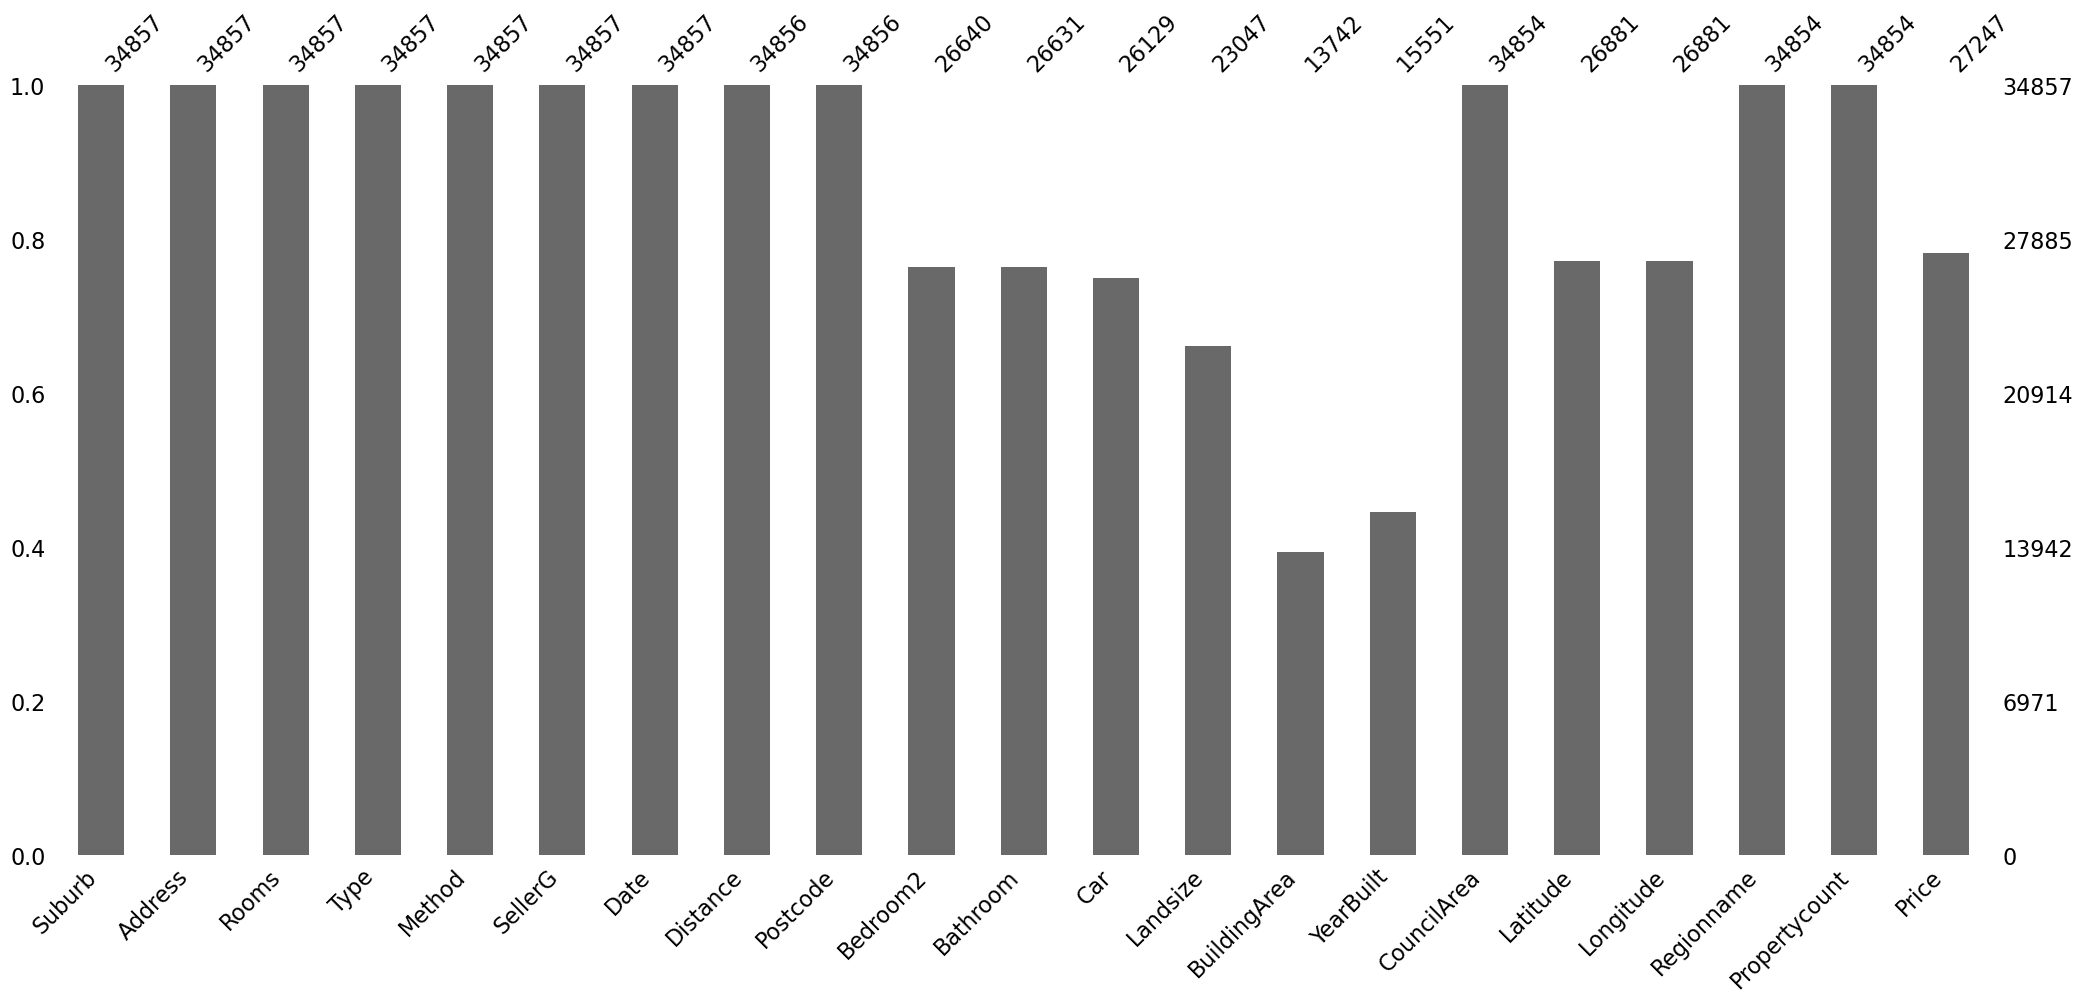

In [10]:
msno.bar(df)

The columns Bedroom2, Bathroom, Car, Latitude, Longitude, and Price constitute 20-25% of the missing values.
Also,BuildingArea and Yearbuilt contain 50-60% of the missing values with Landsize about 30%.

<AxesSubplot:>

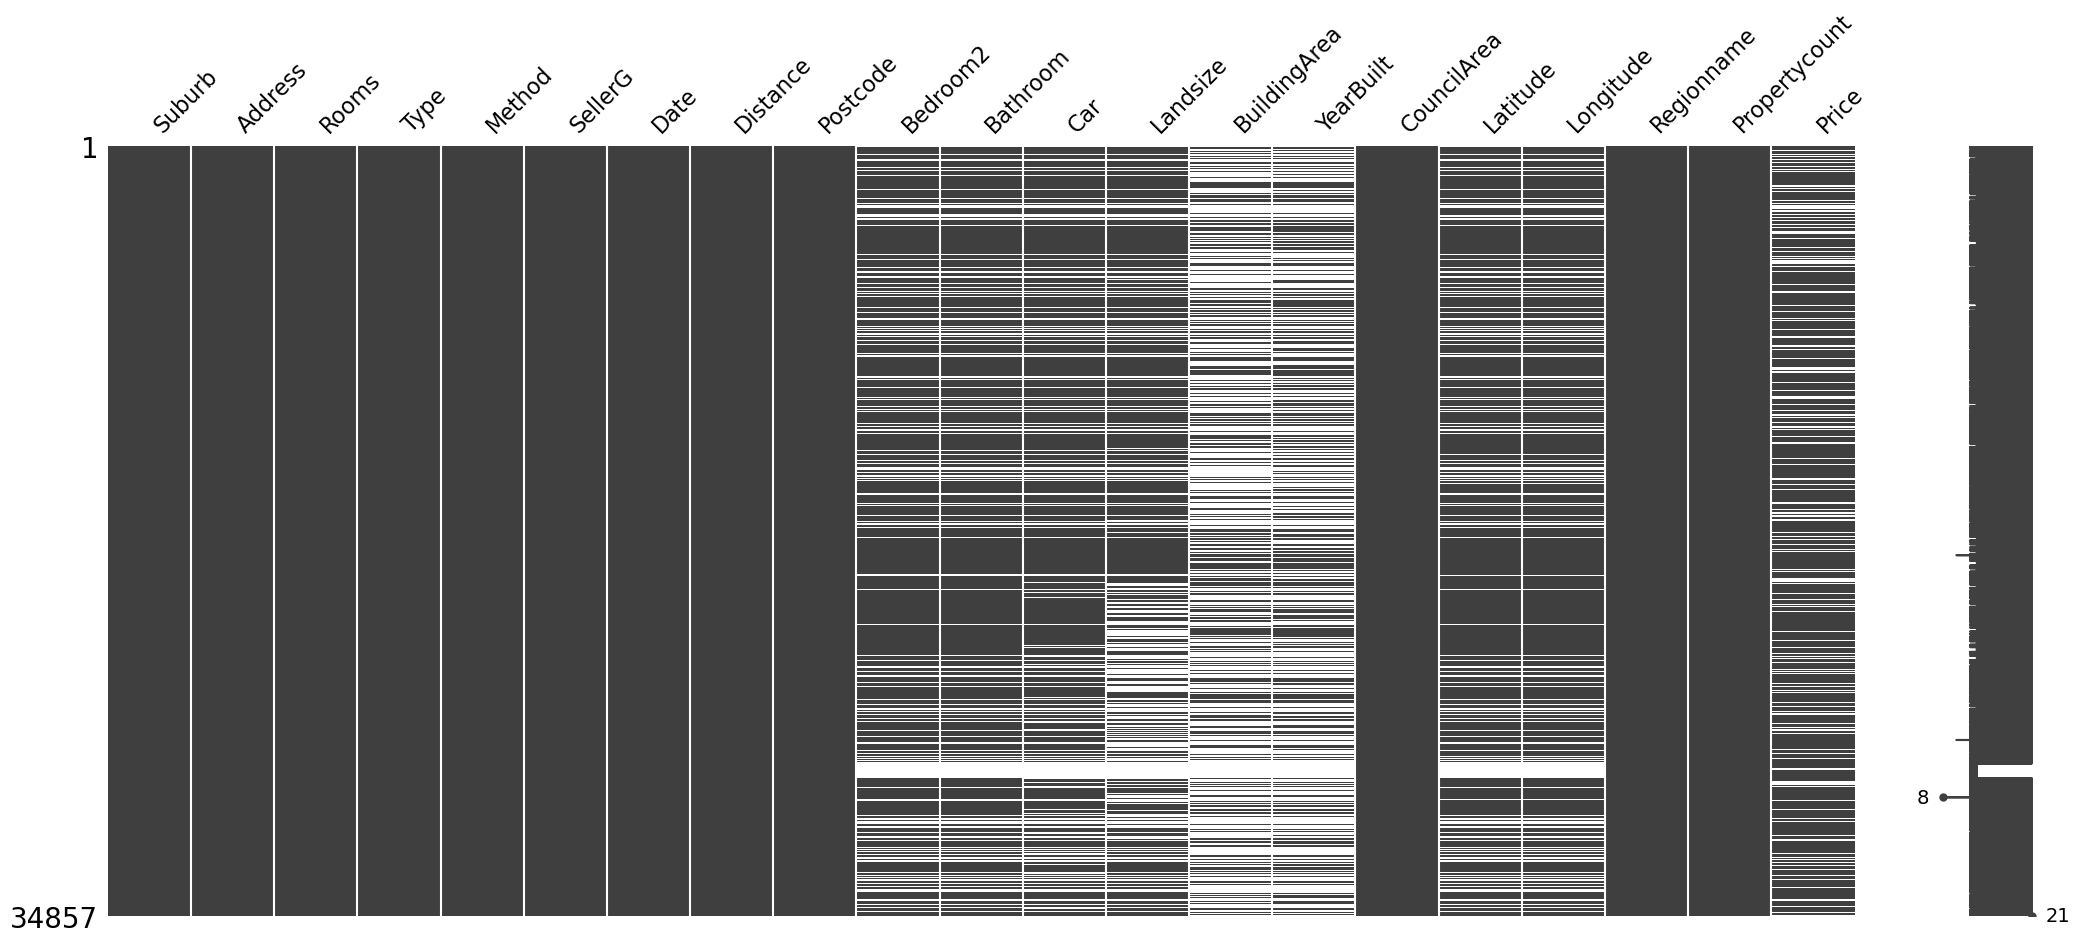

In [11]:
# the pattern of missing values 
msno.matrix(df)

Patterns in Bedroom2, Bathroom, Car, Latitude, and Longitude are highly correlated similar to Landsize too.
BuildingArea and YearBuilt are correlated to each other also.

(13.0, 0.0)

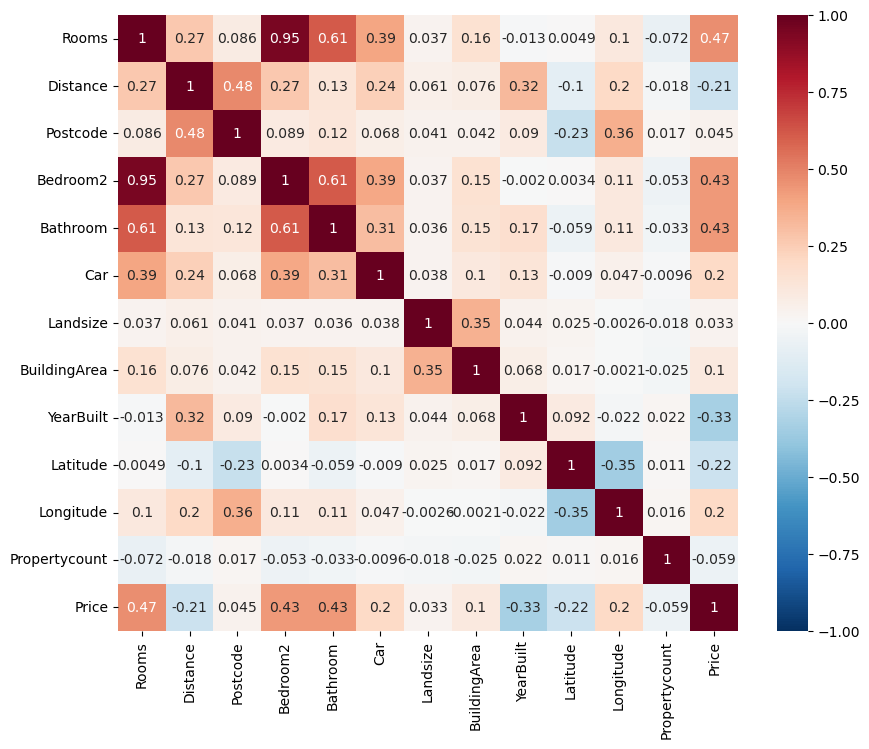

In [12]:
#Checking for correlation
plt.figure(figsize=(10,8))
ax=sns.heatmap(df.corr(), cmap='RdBu_r',annot=True, vmin=-1, vmax=1)
ax.set_ylim(13,0)

The correlation between Price and the columns BuildingArea,Yearbuilt and Landsize is too low with each having wholesome missing values.
So,we would be dropping those columns.

In [13]:
df.drop(['Landsize','BuildingArea','YearBuilt'], axis=1, inplace=True)

The correlation between Bedroom2 and Rooms is very high with Bedroom2 having 8217 missing values. 

In [14]:
coef,p_val = stats.pearsonr(df[df['Bedroom2'].notnull()]['Bedroom2'],df[df['Bedroom2'].notnull()]['Rooms'])
print('The correlation coefficient between Bedroom2 and Rooms:',coef)

The correlation coefficient between Bedroom2 and Rooms: 0.946754623129914


In [15]:
df.drop(['Bedroom2'],axis=1,inplace=True)

The more the Rooms , the more the Bathroom too,we will check the collinearity of Bathroom with Rooms.

In [16]:
coef,p_val = stats.pearsonr(df[df['Bathroom'].notnull()]['Bathroom'],df[df['Bathroom'].notnull()]['Rooms'])
print('The correlation coefficient between Bathroom and Rooms:',coef)

The correlation coefficient between Bathroom and Rooms: 0.611825859441651


In [17]:
#Although the collinearity is fairly high,we will use Variation Inflation Factor:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('Price ~ Rooms + Bathroom + Car', df, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF,features
0,11.851791,Intercept
1,1.718915,Rooms
2,1.600451,Bathroom
3,1.194295,Car


VIF>5 generally to explain high collinearity.We will look at the distribution of the columns to replace the missing values with alternatives.

C:\pyth\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Bathroom')

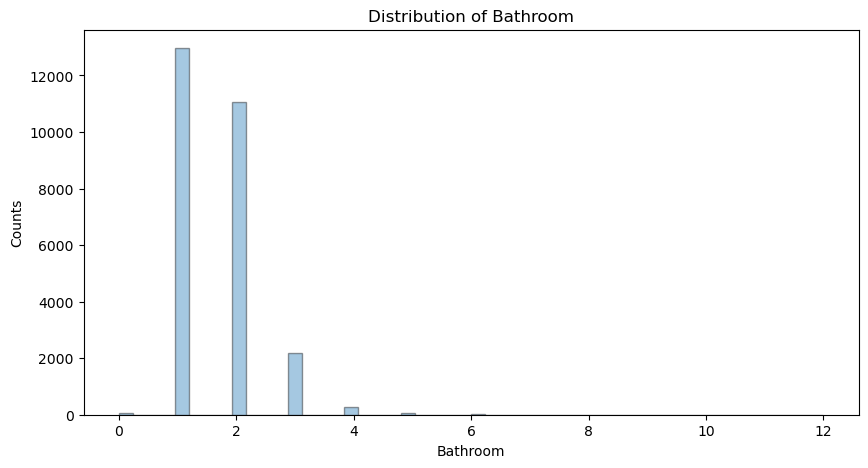

In [18]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['Bathroom'].notnull()].Bathroom, hist=True, kde=False, hist_kws={'edgecolor':'black'})
plt.ylabel('Counts')
plt.title('Distribution of Bathroom')

Most of the rooms have 1-2 Bathrooms , so we would use median values to replace.
Since Rooms are a good predictor for Bathrooms , we would check the level of Rooms into 3 categories and replace them with the values accordingly.

In [19]:
df['Rooms'].value_counts()

3     15084
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

In [20]:
df['Rooms2'] = None
df.loc[(df['Rooms']<3), 'Rooms2'] = 'low'
df.loc[(df['Rooms']>=3)&(df['Rooms']<6), 'Rooms2'] = 'medium'
df.loc[(df['Rooms']>=6), 'Rooms2'] = 'high'

bath_low = df[df['Rooms2']=='low'].Bathroom.median()
bath_medium = df[df['Rooms2']=='medium'].Bathroom.median()
bath_high = df[df['Rooms2']=='high'].Bathroom.median()

df.loc[df['Rooms2']=='low', 'Bathroom'] = df.loc[df['Rooms2']=='low', 'Bathroom'].fillna(bath_low)
df.loc[df['Rooms2']=='medium', 'Bathroom'] = df.loc[df['Rooms2']=='medium', 'Bathroom'].fillna(bath_medium)
df.loc[df['Rooms2']=='high', 'Bathroom'] = df.loc[df['Rooms2']=='high', 'Bathroom'].fillna(bath_high)

Car represents the car parking spots which might have a correlation with Rooms.We will use VIF to check the same.
Also check the distribution for Car accordingly.

C:\pyth\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Car')

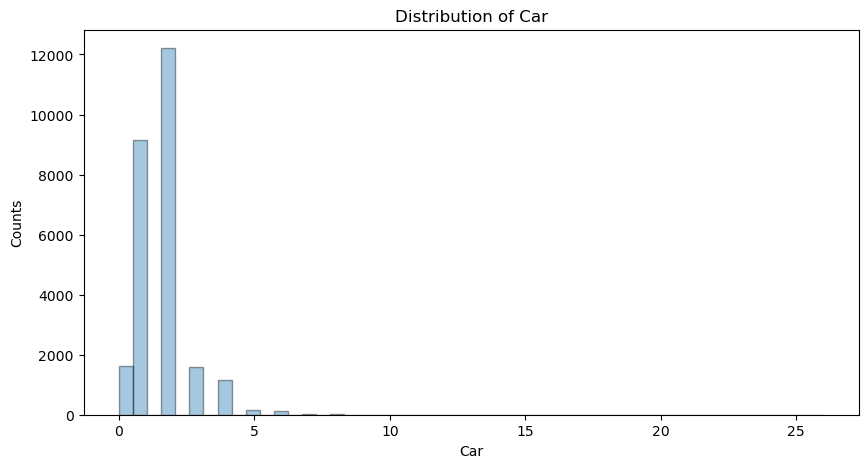

In [21]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['Car'].notnull()].Car, hist=True, kde=False, hist_kws={'edgecolor':'black'})
plt.ylabel('Counts')
plt.title('Distribution of Car')

In [22]:
coef,p_val = stats.pearsonr(df[df['Car'].notnull()]['Car'],df[df['Car'].notnull()]['Rooms'])
print('The correlation coefficient between Car and Rooms:', coef)

The correlation coefficient between Car and Rooms: 0.39387783829712786


Since most houses have 2-3 cars , we would be applying the same strategy as we applied in case of Bathrooms.

In [23]:
car_low = df[df['Rooms2']=='low'].Car.median()
car_medium = df[df['Rooms2']=='medium'].Car.median()
car_high = df[df['Rooms2']=='high'].Car.median()

df.loc[df['Rooms2']=='low', 'Car'] = df.loc[df['Rooms2']=='low', 'Car'].fillna(car_low)
df.loc[df['Rooms2']=='medium', 'Car'] = df.loc[df['Rooms2']=='medium', 'Car'].fillna(car_medium)
df.loc[df['Rooms2']=='high', 'Car'] = df.loc[df['Rooms2']=='high', 'Car'].fillna(car_high)

In [24]:
#lets have a look at the feature names now
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bathroom', 'Car', 'CouncilArea', 'Latitude',
       'Longitude', 'Regionname', 'Propertycount', 'Price', 'Rooms2'],
      dtype='object')

The problem with Latitude and Longitude is they have lot of missing values which are hard to be replaced with measures of central tendency.
So we will drop them.

In [25]:
df.drop(['Longitude','Latitude'], axis=1, inplace=True)

In our target variable Price,we have lots of missing values.It is better to drop all of them which would not hinder with the accuracy of the prediction.

In [26]:
df.dropna(axis=0, inplace=True)

In [27]:
df.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,CouncilArea,Regionname,Propertycount,Price,Rooms2
1,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,Yarra City Council,Northern Metropolitan,4019.0,1480000.0,low
2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,Yarra City Council,Northern Metropolitan,4019.0,1035000.0,low
4,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,Yarra City Council,Northern Metropolitan,4019.0,1465000.0,medium
5,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,2.0,1.0,Yarra City Council,Northern Metropolitan,4019.0,850000.0,medium
6,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,Yarra City Council,Northern Metropolitan,4019.0,1600000.0,medium


In [28]:
#we are dropping few of the features that would only cause overfitting in our model
df.drop(['Suburb','Address','Postcode','Propertycount','SellerG','CouncilArea', 'Method', 'Date','Rooms2'], axis=1, inplace=True)


In [29]:
df.head()

,Rooms,Type,Distance,Bathroom,Car,Regionname,Price
1,2,h,2.5,1.0,1.0,Northern Metropolitan,1480000.0
2,2,h,2.5,1.0,0.0,Northern Metropolitan,1035000.0
4,3,h,2.5,2.0,0.0,Northern Metropolitan,1465000.0
5,3,h,2.5,2.0,1.0,Northern Metropolitan,850000.0
6,4,h,2.5,1.0,2.0,Northern Metropolitan,1600000.0


In [30]:
#Let us look at the summary statistics of data
df.describe()

,Rooms,Distance,Bathroom,Car,Price
count,27244.000000,27244.000000,27244.000000,27244.000000,2.724400e+04
mean,2.992365,11.280634,1.593745,1.686206,1.050210e+06
std,0.954810,6.787580,0.658678,0.896476,6.414923e+05
min,1.000000,0.000000,0.000000,0.000000,8.500000e+04
25%,2.000000,6.400000,1.000000,1.000000,6.350000e+05
50%,3.000000,10.500000,2.000000,2.000000,8.700000e+05
75%,4.000000,14.000000,2.000000,2.000000,1.295000e+06
max,16.000000,48.100000,9.000000,18.000000,1.120000e+07


In [31]:
#Let us create a function using Inter Quartile range to remove outliers from our numerical columns

In [32]:
def box_dist_plot(Feature):
    f, (ax_box, ax_dist) = plt.subplots(2, figsize=(10,6), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(Feature, data=df, color='blue', ax=ax_box)
    sns.distplot(df[Feature],hist=True, kde=False, color='blue', ax=ax_dist)
    ax_dist.set_ylabel('Counts')
    ax_box.set_xlabel('')
    Q1 = df[Feature].quantile(0.25)
    Q3 = df[Feature].quantile(0.75)
    IQR = Q3-Q1
    Lower_quartile = Q1 - 1.5*IQR
    Upper_quartile = Q3 + 1.5*IQR
    print('Lower quartile:',Lower_quartile, 'Upper quartile:',Upper_quartile)


In [33]:
# To remove outlier we create a function
def OutlierRemover(Feature):
    global df
    Q1 = df[Feature].quantile(0.25)
    Q3 = df[Feature].quantile(0.75)
    IQR = Q3-Q1
    Lower_quartile = Q1 - 1.5*IQR
    Upper_quartile = Q3 + 1.5*IQR
    df = df[(df[Feature]>Lower_quartile)&(df[Feature]<Upper_quartile)]

C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\pyth\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower quartile: -355000.0 Upper quartile: 2285000.0


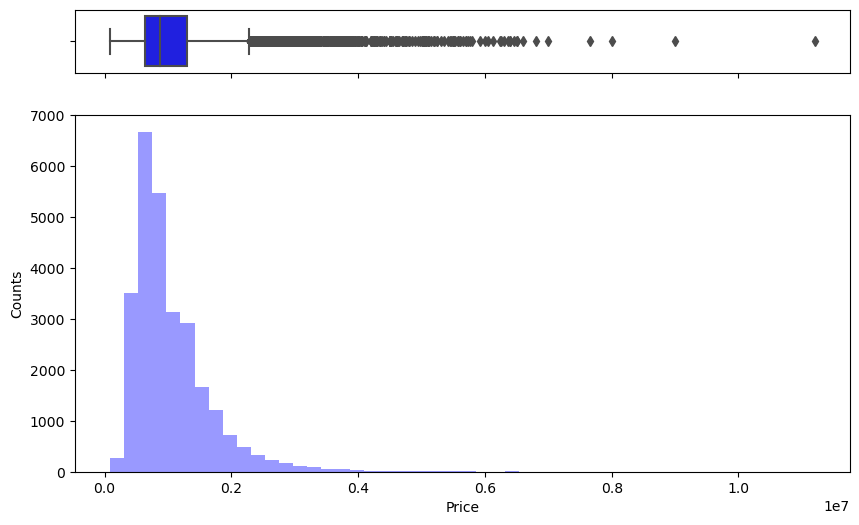

In [34]:
#for Price feature
box_dist_plot('Price')

In [35]:
OutlierRemover('Price')

C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\pyth\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower quartile: 0.5 Upper quartile: 4.5


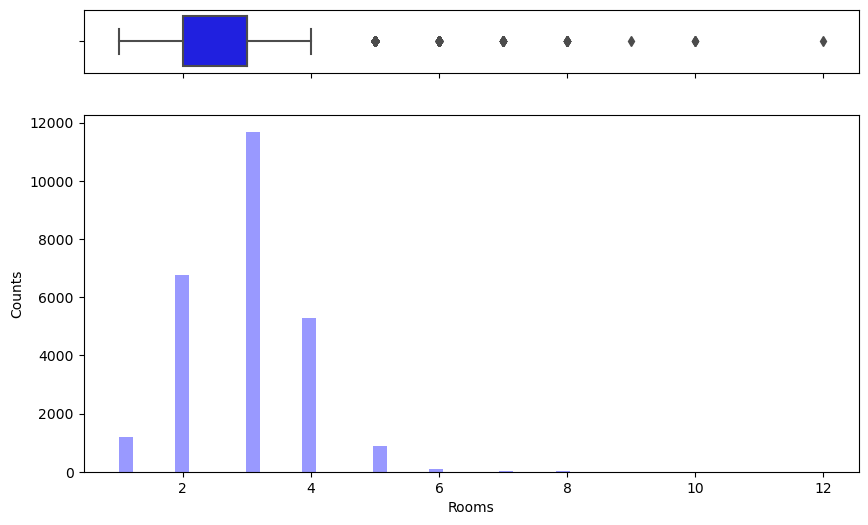

In [36]:
#We would apply the same accordingly for Rooms,Distance,Bathroom,Car
box_dist_plot('Rooms')

In [37]:
OutlierRemover('Rooms')

C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\pyth\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower quartile: -4.999999999999998 Upper quartile: 25.4


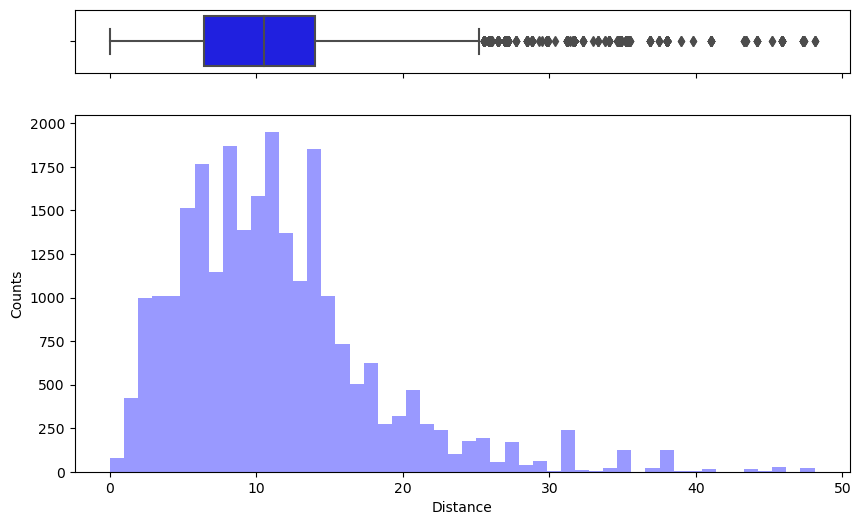

In [38]:
#Distance
box_dist_plot('Distance')
OutlierRemover('Distance')

C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\pyth\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower quartile: -0.5 Upper quartile: 3.5


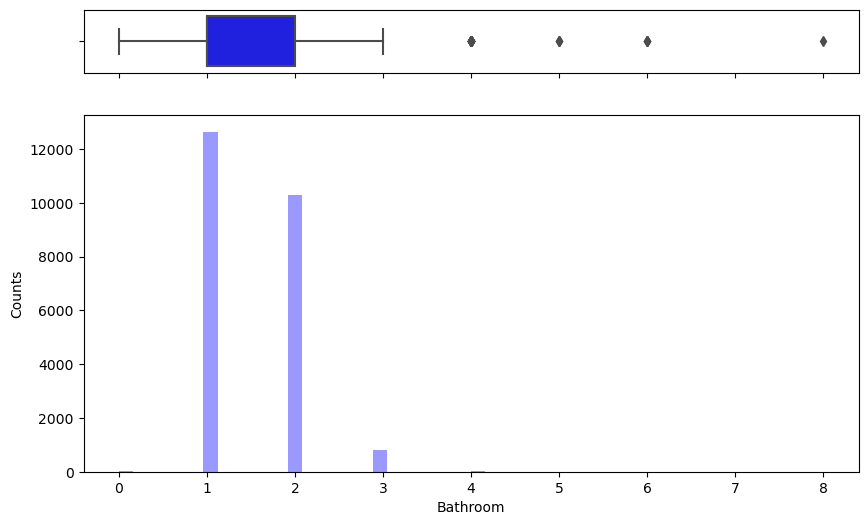

In [39]:
#Bathroom
box_dist_plot('Bathroom')
OutlierRemover('Bathroom')

C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\pyth\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Lower quartile: -0.5 Upper quartile: 3.5


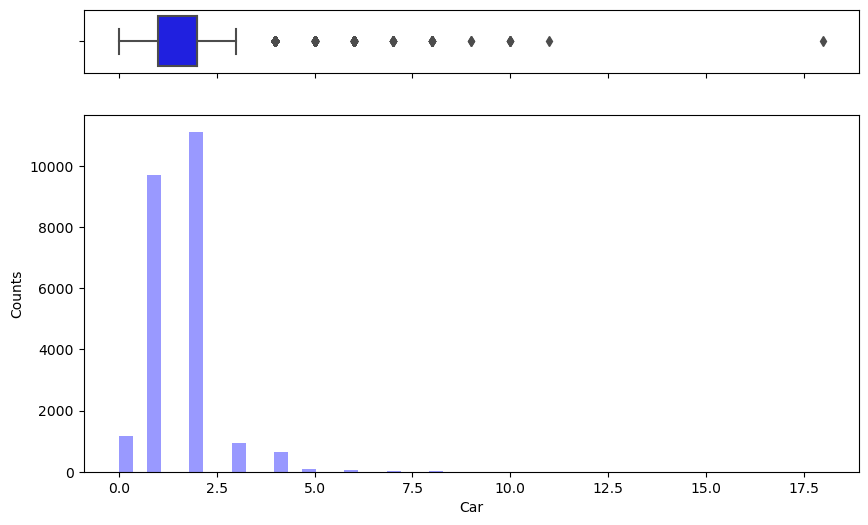

In [40]:
#Car
box_dist_plot('Car')
OutlierRemover('Car')

### Exploratory Data Analysis

We can observe that distance is inversely related to the Price.However,Rooms,Bathroom and Car have a positive relationship with the target variable.

C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass 

Text(0, 0.5, '')

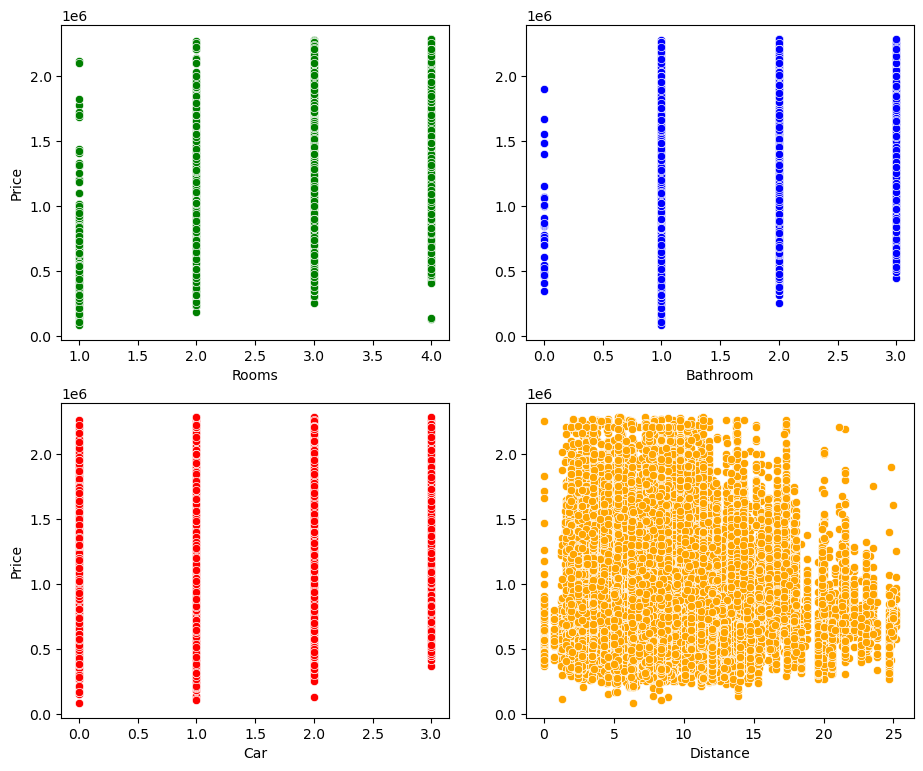

In [41]:
#Let us plot scatter plots against these variables
f,ax = plt.subplots(2,2,figsize=(11,9))

sns.scatterplot('Rooms', 'Price', data=df, color='g', ax=ax[0,0])
sns.scatterplot('Bathroom', 'Price', data=df, color='b', ax=ax[0,1])
sns.scatterplot('Car', 'Price', data=df, color='r', ax=ax[1,0])
sns.scatterplot('Distance', 'Price', data=df, color='orange', ax=ax[1,1])

ax[0,1].set_ylabel('')
ax[1,1].set_ylabel('')

This relationship plot display is quite vague,we will using hexbin plot to determine the same.The more the datapoints the darker is the hexbin.

In [42]:
import matplotlib.image as mpimg

C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


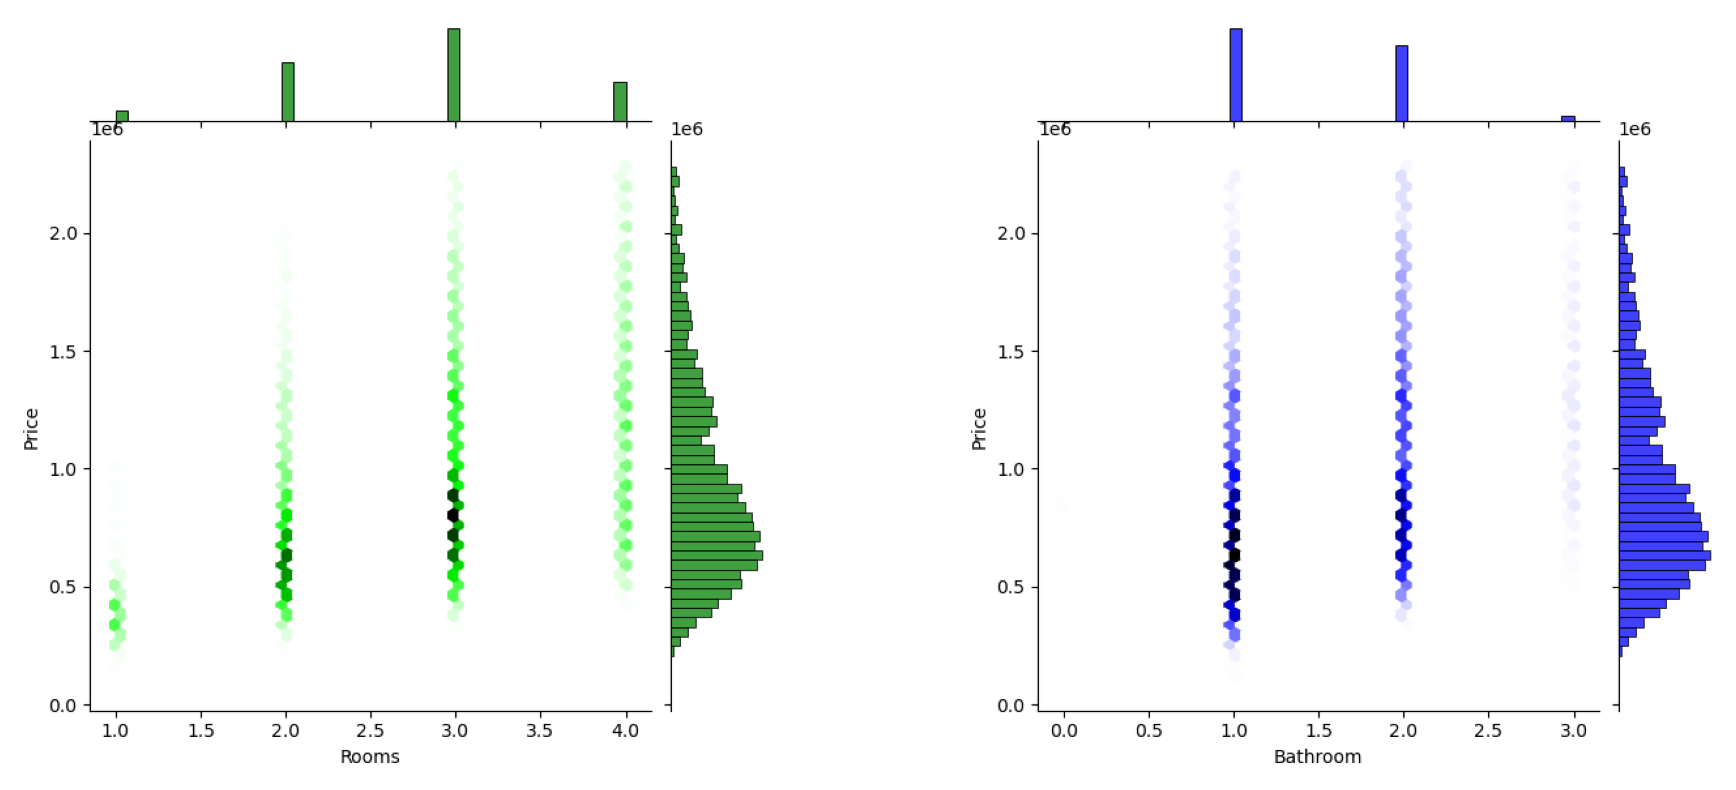

In [43]:
JG1 = sns.jointplot('Rooms', 'Price', data=df, kind='hex', color='g')
JG2 = sns.jointplot('Bathroom', 'Price', data=df, kind='hex', color='b')

JG1.savefig('JG1.png')
plt.close(JG1.fig)

JG2.savefig('JG2.png')
plt.close(JG2.fig)

f, ax = plt.subplots(1,2,figsize=(20, 8))

ax[0].imshow(mpimg.imread('JG1.png'))
ax[1].imshow(mpimg.imread('JG2.png'))

[ax.set_axis_off() for ax in ax.ravel()]
plt.tight_layout()

C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


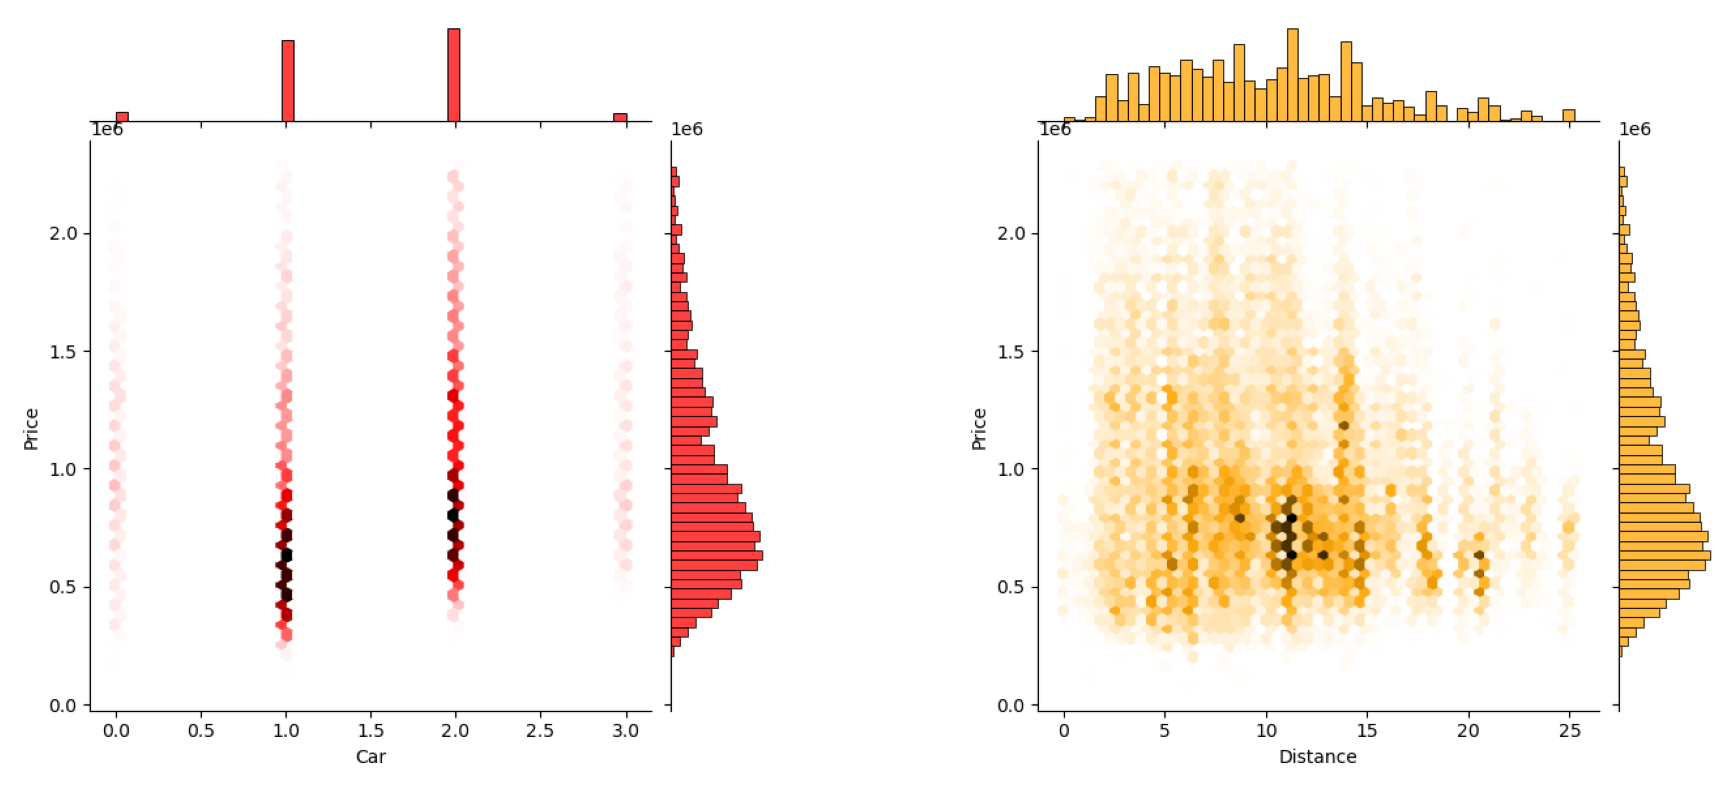

In [44]:
JG3 = sns.jointplot('Car', 'Price', data=df, kind='hex', color='r')
JG4 = sns.jointplot('Distance', 'Price', data=df, kind='hex', color='orange') 

JG3.savefig('JG3.png')
plt.close(JG3.fig)

JG4.savefig('JG4.png')
plt.close(JG4.fig)

f, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].imshow(mpimg.imread('JG3.png'))
ax[1].imshow(mpimg.imread('JG4.png'))

[ax.set_axis_off() for ax in ax.ravel()]
plt.tight_layout()

Distance have clearly a negative relationship with Price whereas Car,Rooms and Bathroom maintain a positive one.

(5.0, 0.0)

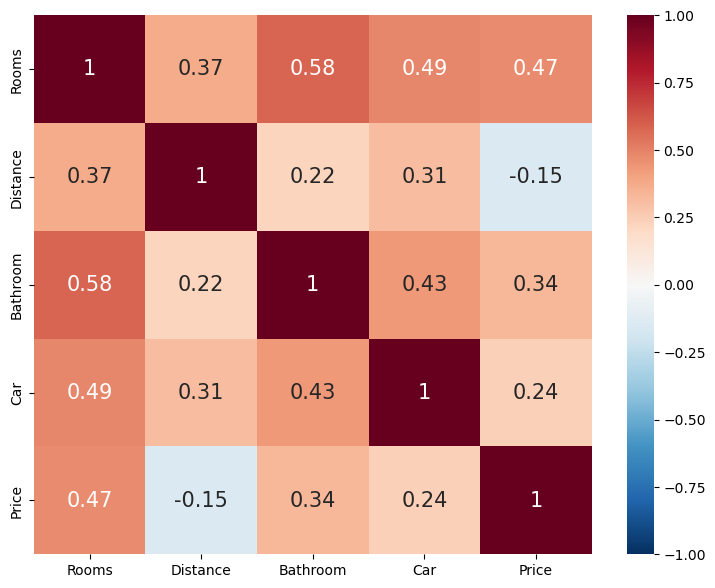

In [45]:
#correlation heatmap
plt.figure(figsize=(9,7))
ax = sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, annot_kws={"size": 15}, vmin=-1, vmax=1)
ax.set_ylim(5,0)

There is a positive correlation between Car,Bathroom,Rooms with Price with Distance being negative.

In [47]:
df.columns

Index(['Rooms', 'Type', 'Distance', 'Bathroom', 'Car', 'Regionname', 'Price'], dtype='object')

We have categorical columns Type and Regionname.

C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Northern Metropolitan         7178
Southern Metropolitan         7068
Western Metropolitan          5083
Eastern Metropolitan          2799
South-Eastern Metropolitan     788
Northern Victoria               28
Eastern Victoria                 1
Name: Regionname, dtype: int64

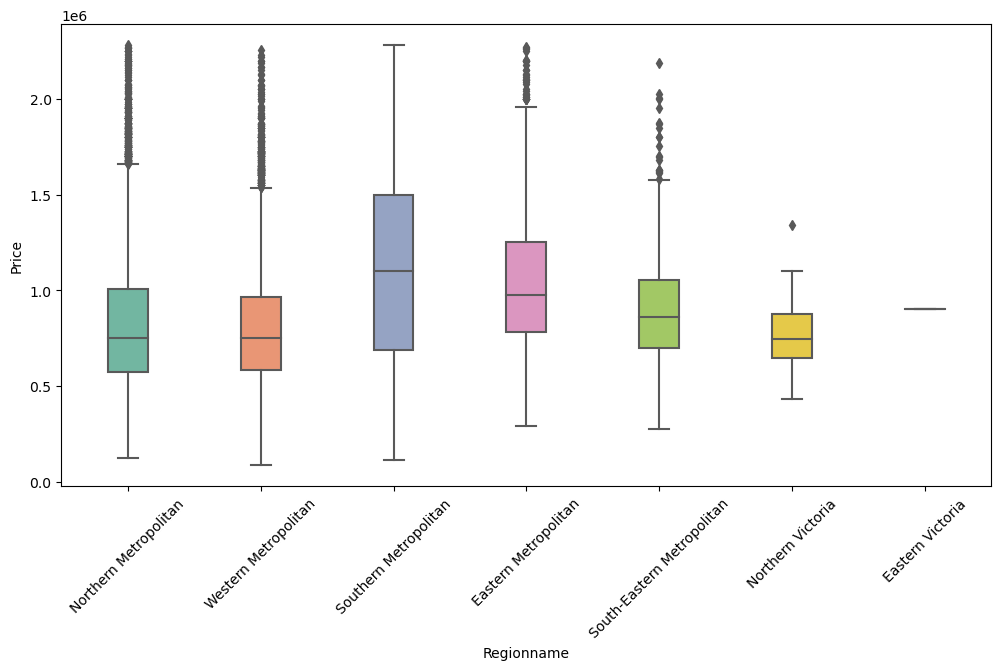

In [48]:
#Boxplot between Regionname and Price
plt.figure(figsize=(12,6))
sns.boxplot('Regionname', 'Price', data=df, width=0.3, palette="Set2")
plt.xticks(rotation=45)

df['Regionname'].value_counts()

The house prices for the Southern and Eastern are the highest and more expensive as compared to other regions.


In [50]:
#We would be creating dummy variables for the Regionname now:
region = pd.get_dummies(df['Regionname'],drop_first=True)
df = pd.merge(df, region, left_index=True, right_index=True)
df.drop('Regionname', axis=1, inplace=True)


C:\pyth\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


h    14351
u     5817
t     2777
Name: Type, dtype: int64

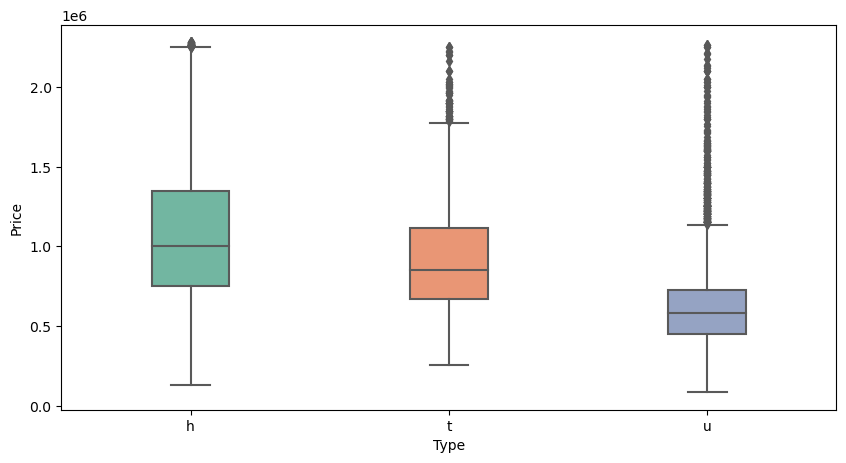

In [51]:
#Boxplot for Type and Price
plt.figure(figsize=(10,5))
sns.boxplot('Type', 'Price', data=df, width=0.3, palette="Set2")

df['Type'].value_counts()

In [55]:
df['Type'].describe()

count     22945
unique        3
top           h
freq      14351
Name: Type, dtype: object

60% of the observation is type h , only 25% belong to u.Let's create dummies for Type as well and combine them into the data set.



In [56]:
house_type = pd.get_dummies(df['Type'], drop_first=True)
df = pd.merge(df,house_type, left_index=True, right_index=True)
df.drop('Type', axis=1, inplace=True)

### Predictive Modeling

###### We would using Linear regression ,Ridge Regression,K Nearest Neighbours and Decision tree algorithms.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [58]:
#We would seperate the independent and dependent variables
#And then do the train test split
X=df.drop('Price', axis=1)
y=df['Price']

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3, random_state=0)


The coefficient of determination is expressed as R2.We would use this performance metric to determine the variance of the target by the model over the total variance of the target.The values would range from 0-1 with 1 being best prediction. 

The second performance metric is the Mean Squared Error(MSE).The average of the squared difference between estimated or predicted values and the actual values.The less the value of MSE the better is the model.We would use the squared root of this metric i.e. RMSE.

We would create 2 functions for the calculate and display the performance of our models.

In [59]:
def Pred_Model(estimator):
    estimator.fit(train_X, train_y)
    prediction = estimator.predict(test_X)
    print('R_squared:', metrics.r2_score(test_y, prediction))
    print('Square Root of MSE:',np.sqrt(metrics.mean_squared_error(test_y, prediction)))
    plt.figure(figsize=(10,5))
    sns.distplot(test_y, hist=True, kde=False)
    sns.distplot(prediction, hist=True, kde=False)
    plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
    plt.xlim(0,)

In [60]:
def FeatBar(model_Features, Title, yLabel):
    plt.figure(figsize=(10,5))
    plt.bar(df.columns[df.columns!='Price'].values, model_Features)
    plt.xticks(rotation=45)
    plt.title(Title)
    plt.ylabel(yLabel)

### Model Predictions

##### Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

R_squared: 0.6145909339366226
Square Root of MSE: 264465.219925101


C:\pyth\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


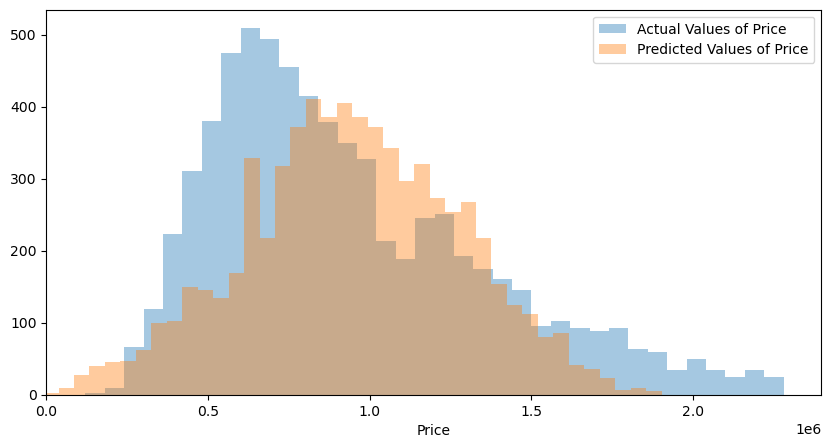

In [62]:
lr = LinearRegression()
Pred_Model(lr)

61% of the housing prices are being predicted correctly by the model.
The averaged difference for each prediction is 264465 for all predictions of the testing set.

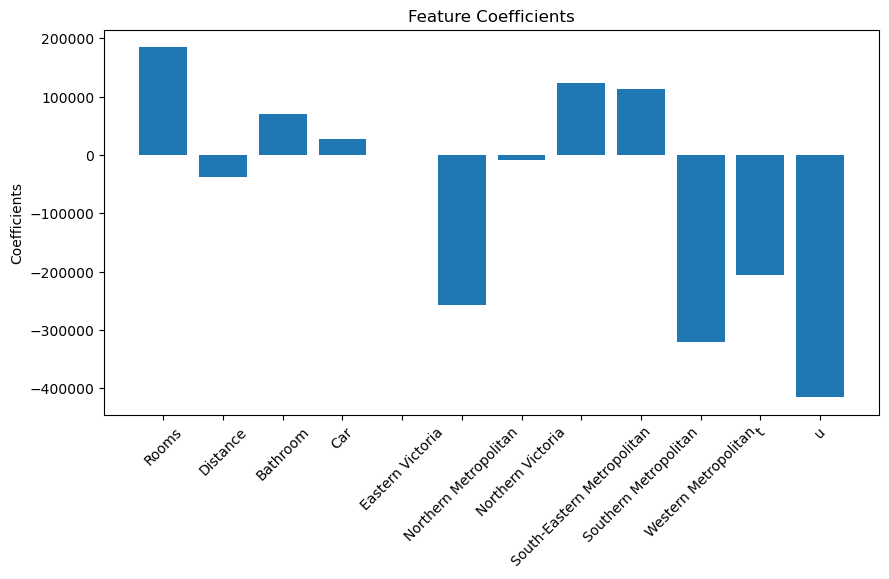

In [63]:
FeatBar(lr.coef_, 'Feature Coefficients', 'Coefficients')

The coefficient along y axis represent the magnitude of impact on each of the feature from above bar chart.

In [64]:
lr.coef_

array([ 1.84486419e+05, -3.83630043e+04,  7.03134611e+04,  2.65798965e+04,
       -5.82076609e-11, -2.57838436e+05, -7.84193065e+03,  1.23191699e+05,
        1.13614860e+05, -3.20164997e+05, -2.05372014e+05, -4.15422202e+05])

From the coefficient changes of the features , we can arrive at some inferences.


For 1 unit increase in a Room,Car and Bathroom the increase is prices are respectively $184,486,$26,580 and $70,313.


Also,for 1 km decrease in distance from CBD the price also goes down by $38,363.

For Regionname,the coefficient for South-Eastern Metropolitan is 123192. Due to the multi-collinearity issue, the dummy for Eastern Metropolitan is dropped. Therefore, the meaning of the coefficient is that the shift from Eastern Metropolitan to South-Eastern Metropolitan has the impact of the price increase by $123,192.

Also for Type, h is dropped due to collinearity. The coefficient for u is -415422. This means that the change of the house type from u to h has the impact to increase price by $415,422.

#### Ridge Regression

In [66]:
from sklearn.linear_model import Ridge

R_squared: 0.6132626365323604
Square Root of MSE: 264920.56249613734


C:\pyth\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


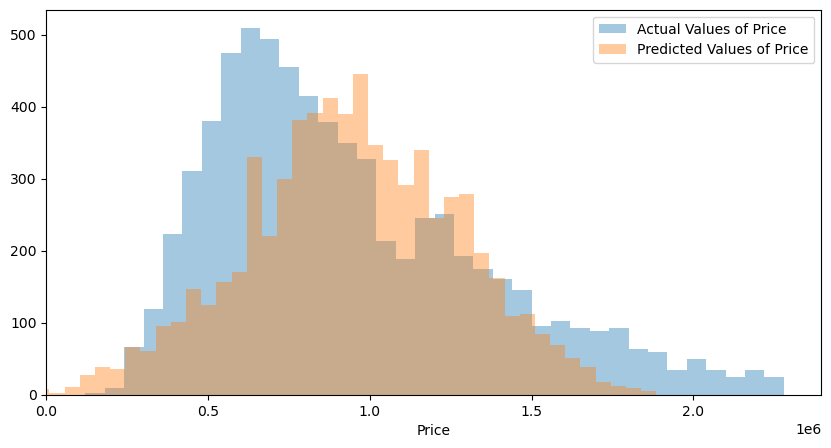

In [68]:
rr = Ridge(alpha=100)
Pred_Model(rr)

With alpha=100 the R2 value of the model is 0.6133 and RMSE is 264,920.The performance of the model with alpha equal to 100 appears to be a little bit worse than the linear regression.

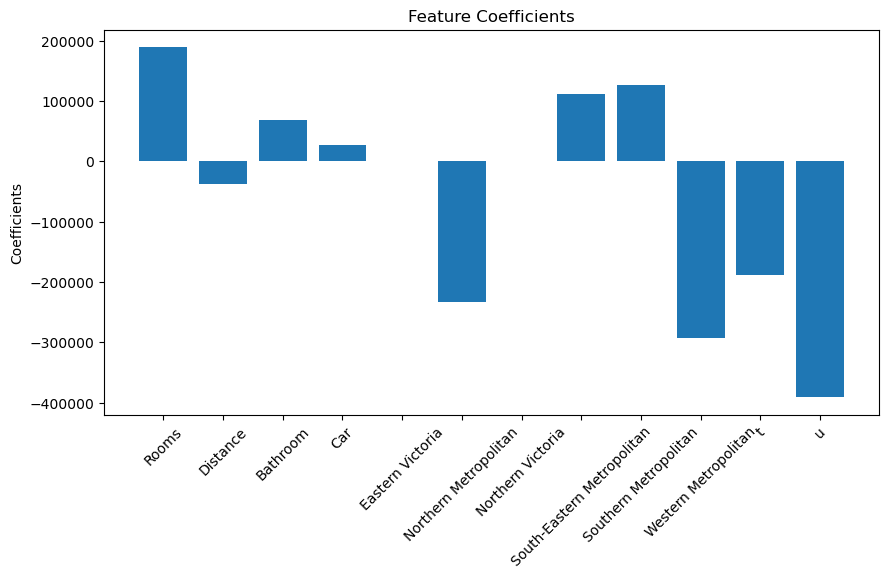

In [69]:
FeatBar(rr.coef_, 'Feature Coefficients', 'Coefficients')

The magnitude of coefficients in ridge regression is much smaller than those in linear regression by far.

#### K Nearest Neighbours

In [70]:
from sklearn.neighbors import KNeighborsRegressor

R_squared: 0.706710824792203
Square Root of MSE: 230704.26297617928


C:\pyth\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


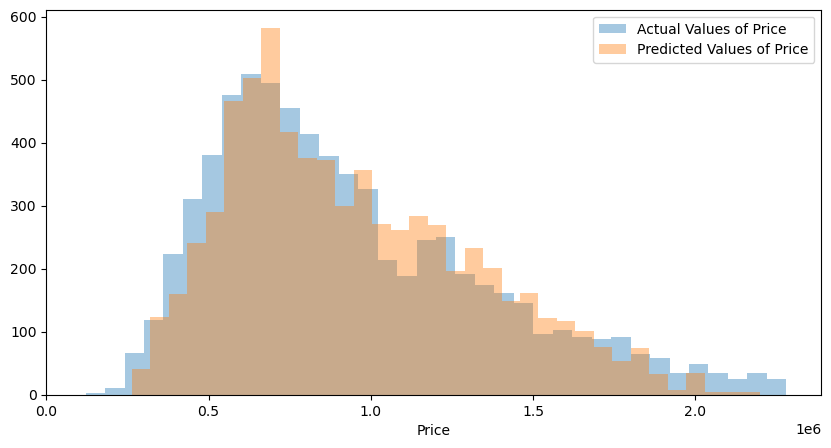

In [71]:
knn = KNeighborsRegressor(n_neighbors=5)
Pred_Model(knn)

Using neighbours =5 The R² of this model is 0.7053, and the RMSE is 231,250. This is a much better metric performance than the above 2 models.

#### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor

R_squared: 0.6919890752208913
Square Root of MSE: 236423.5111294015


C:\pyth\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


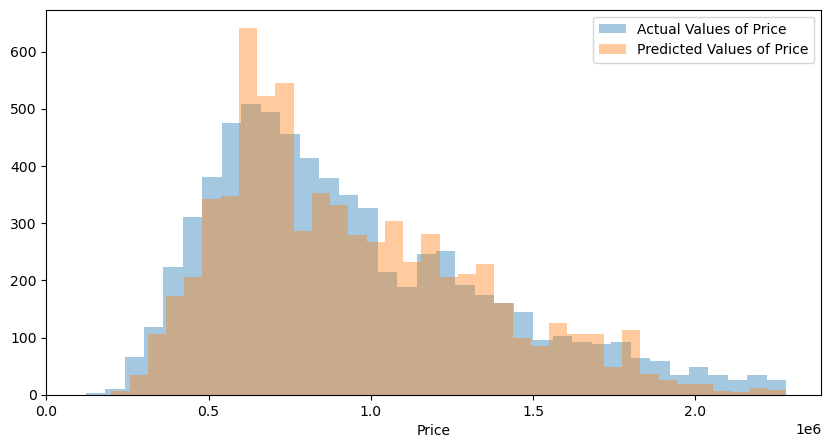

In [73]:
dt = DecisionTreeRegressor(max_depth=15, random_state=0)
Pred_Model(dt)

With more depth,the decision tree has more branches and becomes bigger.Prediction becomes accurate accordingly.Here using max depth=15,the R2 value is 0.6920 and RMSE is 236,424.

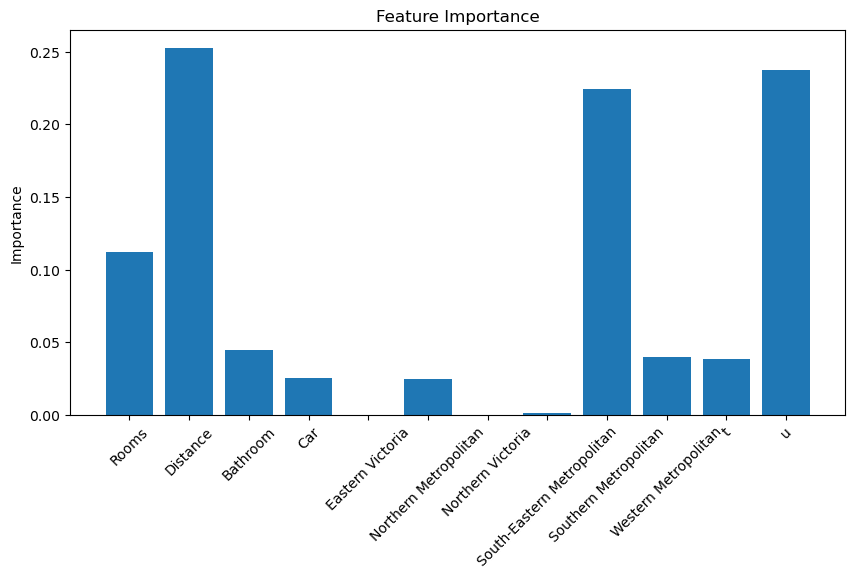

In [74]:
FeatBar(dt.feature_importances_, 'Feature Importance', 'Importance')

### Performance summary

In [75]:
regressor = ['Linear Regression', 'Ridge Regression', 'KNN', 'Decision Tree']
models = [LinearRegression(), Ridge(alpha=100), KNeighborsRegressor(n_neighbors=5), DecisionTreeRegressor(max_depth=15, random_state=0)]
R_squared = []
RMSE = []
for m in models:
    m.fit(train_X, train_y)
    prediction_m = m.predict(test_X)
    r2 = metrics.r2_score(test_y, prediction_m)
    rmse = np.sqrt(metrics.mean_squared_error(test_y, prediction_m))
    R_squared.append(r2)
    RMSE.append(rmse)
basic_result = pd.DataFrame({'R squared':R_squared,'RMSE':RMSE}, index=regressor)
basic_result

,R squared,RMSE
Linear Regression,0.614591,264465.219925
Ridge Regression,0.613263,264920.562496
KNN,0.706711,230704.262976
Decision Tree,0.691989,236423.511129


KNN seems to be the optimal model for accuracy.Now,we would be using some hyperparameter tuning to improve our accuracies.

### Cross validation and Grid Search

#### Linear Regression

In [76]:
scoring={'R_squared':'r2', 'Square Root of MSE': 'neg_mean_squared_error'}

In [77]:
def CrossVal(estimator):
    scores = cross_validate(estimator, X, y, cv=10, scoring=scoring)
    r2 = scores['test_R_squared'].mean()
    mse = abs(scores['test_Square Root of MSE'].mean())
    print('R_squared:', r2)
    print('Square Root of MSE:', np.sqrt(mse))

In [78]:
CrossVal(LinearRegression())

R_squared: 0.5918115585795767
Square Root of MSE: 269131.0885647731


Since ,there is no hyperparameter in linear regression,only 10 times of CV is performed here.
The average of the R² is 0.5918 and the RMSE is 269131.

#### Ridge Regression

Since,we have alpha as a hyperparameter here . The set of the grid for alpha is set to be [0.01, 0.1, 1, 10, 100, 1000, 10000] here.


In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
def GridSearch(estimator, Features, Target, param_grid):
    for key, value in scoring.items():
        grid = GridSearchCV(estimator, param_grid, cv=10, scoring=value)
        grid.fit(Features,Target)
        print(key)
        print('The Best Parameter:', grid.best_params_)
        if grid.best_score_ > 0:
            print('The Score:', grid.best_score_)
        else:
            print('The Score:', np.sqrt(abs(grid.best_score_)))
        print()

In [82]:
param_grid = {'alpha':[0.01, 0.1, 1, 10, 100, 1000, 10000]}

GridSearch(Ridge(), X, y, param_grid)

R_squared
The Best Parameter: {'alpha': 10}
The Score: 0.5918421809211574

Square Root of MSE
The Best Parameter: {'alpha': 10}
The Score: 269123.55251289543



The result shows that the best value of the alpha is 10. The R² and the RMSE are 0.5918 and 269124, respectively, under alpha = 10.

#### K Nearest Neighbours

In [83]:
#The range for the grid is the integers from 5 to 25.
param_grid = dict(n_neighbors=np.arange(5,26))

GridSearch(KNeighborsRegressor(), X, y, param_grid)

R_squared
The Best Parameter: {'n_neighbors': 18}
The Score: 0.696274775861461

Square Root of MSE
The Best Parameter: {'n_neighbors': 18}
The Score: 233281.47297042038



Optimal neighbours found is 18.The R² and the RMSE are 0.6963 and 233281 respectively.

### Cross Validation Summary

In [84]:
from sklearn.model_selection import validation_curve

In [89]:
lr_scores = cross_validate(LinearRegression(), X, y, cv=10, scoring='r2')
rr_scores = cross_validate(Ridge(alpha=10), X, y, cv=10, scoring='r2')
knn_scores = cross_validate(KNeighborsRegressor(n_neighbors=16), X, y, cv=10, scoring='r2')
dt_scores = cross_validate(DecisionTreeRegressor(max_depth=9, random_state=0), X, y, cv=10, scoring='r2')

lr_test_score = lr_scores.get('test_score')
rr_test_score = rr_scores.get('test_score')
knn_test_score = knn_scores.get('test_score')
dt_test_score = dt_scores.get('test_score')

box= pd.DataFrame({'Linear Regression':lr_test_score, 'Ridge Regression':rr_test_score, 'K-Nearest Neighbors':knn_test_score, 'Decision Tree':dt_test_score})
box.index = box.index + 1
box.loc['Mean'] = box.mean()
box

,Linear Regression,Ridge Regression,K-Nearest Neighbors,Decision Tree
1,0.633088,0.632853,0.641696,0.643469
2,0.618220,0.618500,0.696862,0.682198
3,0.475365,0.476083,0.629422,0.617119
4,0.612866,0.612847,0.663423,0.643760
5,0.580284,0.580233,0.689747,0.676222
6,0.579387,0.579134,0.728601,0.700413
7,0.625552,0.625600,0.745332,0.721238
8,0.614225,0.614070,0.738645,0.736136
9,0.577580,0.577570,0.703622,0.694580
10,0.601549,0.601531,0.722933,0.729866


after 10 folds of CV done on every model with respective hyperparameter tuning , the mean of scores for KNN model is the best.

Text(0.5, 0, 'K-th Fold')

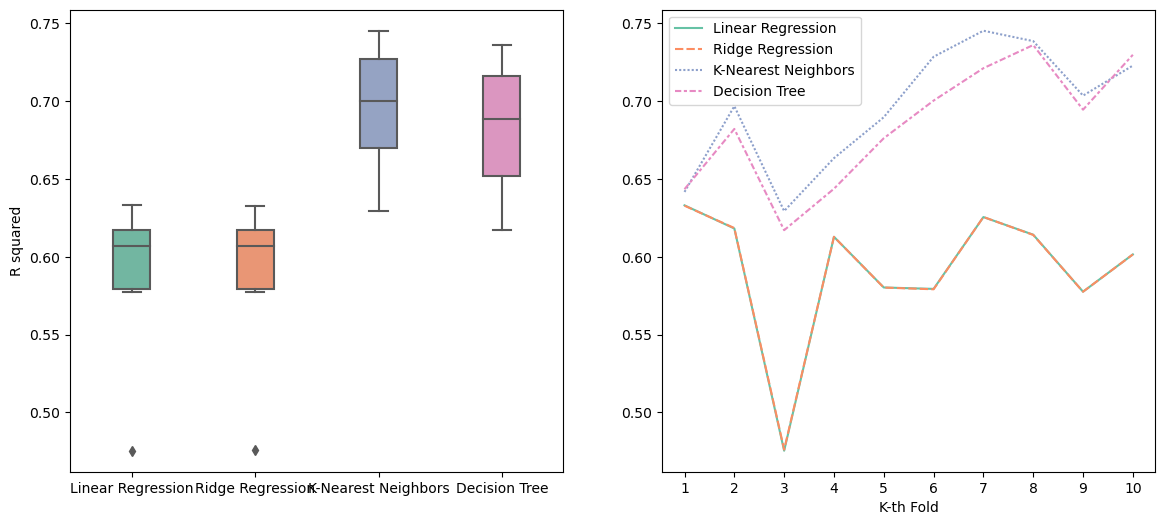

In [90]:
f,ax=plt.subplots(1,2, figsize=(14,6))

sns.boxplot(data=box.drop(box.tail(1).index), width=0.3, palette="Set2", ax=ax[0])
ax[0].set_ylabel('R squared')

sns.lineplot(data=box.drop(box.tail(1).index), palette="Set2", ax=ax[1])
ax[1].set_xticks(np.arange(1,11,1))
ax[1].set_xlabel('K-th Fold')

The box plot and the line plots for each model explains the performance of each.Decision Tree and KNN perform well as compared to the other algorithms.

## Conclusion

As we try to determine the prices of our housing market,we used the following features to fetch the results:Rooms, Bathroom, the number of the Car spots, the Distance to the Central Business District, Regionname, and the Type of the house.

In each of our numerical feature, we excluded anything beyond 1.5 times their IQR as outliers. The models used for the predictions are Linear Regressions, Ridge Regressions, K-Nearest Neighbors, and Decision Tree.

The best performance was shown by KNN model with optimal nearest neighbours of 18.